In [1]:
###import packages 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.cbook as cbook

import pandas as pd
import numpy as np
import plotly as py
import plotly.graph_objs as go

import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

from sklearn.preprocessing import scale
from sklearn.decomposition import PCA



###import data 
df_train = pd.read_csv(r'C:\Users\tfrancois\Documents\Personal\kaggle\train.csv')
df_test = pd.read_csv(r'C:\Users\tfrancois\Documents\Personal\kaggle\test.csv')
df_dest = pd.read_csv(r'C:\Users\tfrancois\Documents\Personal\kaggle\destinations.csv')

#only keep booking data - removed click 
df_train = df_train[df_train['is_booking'] == 1] 



In [2]:
import random
unique_users = set(df_train.user_id.unique())
rand_user_id = random.sample(unique_users,10000)


df_train = pd.DataFrame()
train_chunk = pd.read_csv('train.csv', iterator = True, chunksize = 1000000)
for chunk in train_chunk:
    df_train = df_train.append(chunk.loc[chunk['user_id'].isin(rand_user_id)])
    

#check we have our 10,000 users
df_train['user_id'].nunique()
print(df_train)

                    date_time  site_name  posa_continent  \
3760      2013-01-16 16:30:40         11               3   
3761      2013-01-16 16:32:52         11               3   
3762      2013-02-16 18:20:29         11               3   
3763      2013-02-16 18:21:18         11               3   
3764      2013-02-16 18:22:26         11               3   
...                       ...        ...             ...   
37658510  2014-05-23 07:20:05          2               3   
37658511  2014-05-23 07:21:41          2               3   
37658512  2014-05-23 07:26:57          2               3   
37658513  2014-05-23 07:28:35          2               3   
37658514  2014-05-23 07:30:00          2               3   

          user_location_country  user_location_region  user_location_city  \
3760                        205                   155                6802   
3761                        205                   155                6802   
3762                        205                 

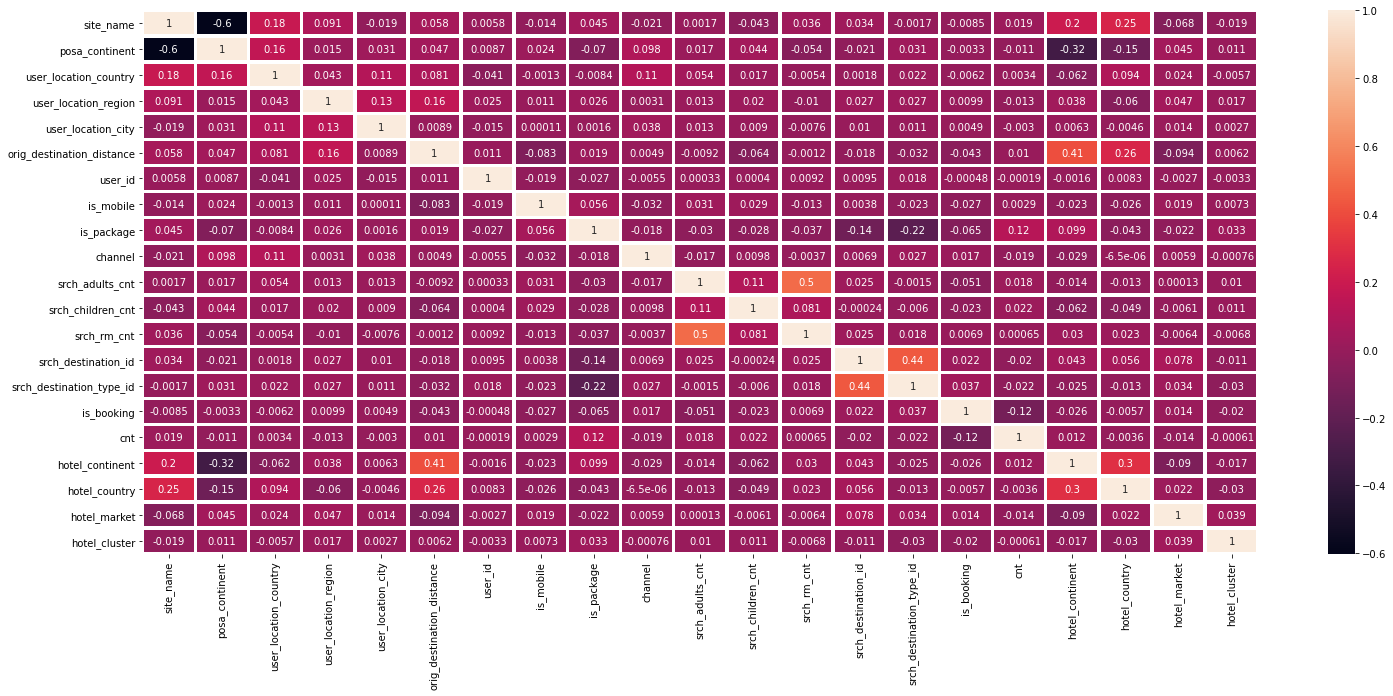

In [3]:

###exploratory analysis 

#columns
df_train.columns

#time 
df_train['date_time'].describe()

#we want to histogram a few columns where the number of values is limited
for col in ['site_name','posa_continent','user_location_country','is_mobile','srch_adults_cnt','srch_children_cnt','srch_rm_cnt','hotel_continent','hotel_country','hotel_cluster']:

    

    df_hotel_cluster = df_train.groupby(by=[col]).count()['user_id'].reset_index()

    py.offline.init_notebook_mode(connected=True)

    trace1 = go.Bar(
        x= df_hotel_cluster[col],
        y= df_hotel_cluster['user_id'],
        name='Histogram')

    data = trace1
    
    layout = go.Layout(
        barmode='group',
        showlegend=False,
        title='histogram',
        yaxis=dict(
        title='count'
        ),
        xaxis=dict(
        title= col
        )
    )

    fig = go.Figure(data=data, layout=layout)
    py.offline.iplot(fig)

#correlation matrix 
corrMatrix = df_train.corr()
plt.figure(figsize = (25,10))
sn.heatmap(corrMatrix, annot=True, linewidths=2.5)
plt.show()

In [4]:
#convert datetime to date
df_train['date'] = pd.to_datetime(df_train['date_time']).dt.date

#histogram of search date
for col in ['date']:

    
    df_hotel_cluster = df_train.groupby(by=[col]).count()['user_id'].reset_index()

    py.offline.init_notebook_mode(connected=True)

    trace1 = go.Bar(
        x= df_hotel_cluster[col],
        y= df_hotel_cluster['user_id'],
        name='Histogram')

    data = trace1
    
    layout = go.Layout(
        barmode='group',
        showlegend=False,
        title='histogram',
        yaxis=dict(
        title='count'
        ),
        xaxis=dict(
        title= col
        )
    )

    fig = go.Figure(data=data, layout=layout)
    py.offline.iplot(fig)

In [5]:
#check in and check out 
for col in ['srch_ci','srch_co']:

    
    df_hotel_cluster = df_train.groupby(by=[col]).count()['user_id'].reset_index()

    py.offline.init_notebook_mode(connected=True)

    trace1 = go.Bar(
        x= df_hotel_cluster[col],
        y= df_hotel_cluster['user_id'],
        name='Histogram')

    data = trace1
    
    layout = go.Layout(
        barmode='group',
        showlegend=False,
        title='histogram',
        yaxis=dict(
        title='count'
        ),
        xaxis=dict(
        title= col
        )
    )

    fig = go.Figure(data=data, layout=layout)
    py.offline.iplot(fig)

In [6]:
print(df_train.columns)

Index(['date_time', 'site_name', 'posa_continent', 'user_location_country',
       'user_location_region', 'user_location_city',
       'orig_destination_distance', 'user_id', 'is_mobile', 'is_package',
       'channel', 'srch_ci', 'srch_co', 'srch_adults_cnt', 'srch_children_cnt',
       'srch_rm_cnt', 'srch_destination_id', 'srch_destination_type_id',
       'is_booking', 'cnt', 'hotel_continent', 'hotel_country', 'hotel_market',
       'hotel_cluster', 'date'],
      dtype='object')


      user_id  booking_count
0         174             10
1         271              3
2         274             24
3         549             28
4         851              4
...       ...            ...
9995  1198044             22
9996  1198144              3
9997  1198435             14
9998  1198484             18
9999  1198717             15

[10000 rows x 2 columns]


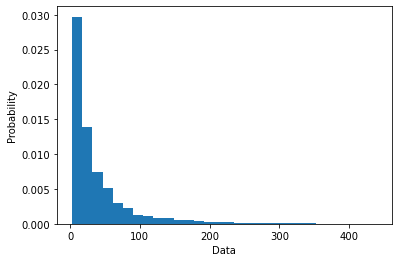

In [7]:
#understand bookings per user (want to know if some users have booked more than others in training data)
df_user_booking_count = df_train.groupby(by=['user_id']).count()['hotel_cluster'].reset_index()

df_user_booking_count = df_user_booking_count.rename(columns={"hotel_cluster": "booking_count"})


x = df_user_booking_count['booking_count']

#usually how you determine length of a bin - here q25 = q75 so bin_width = 0
#q25, q75 = np.percentile(x, [0.25, 0.75])
#bin_width = 2 * (q75 - q25) * len(x) ** (-1/3)
#bins = round((x.max() - x.min()) / bin_width)
#print("Freedman–Diaconis number of bins:", bins)


plt.hist(x, density=True, bins= 30)  # density= false would make counts
plt.ylabel('Probability')
plt.xlabel('Data')

print(df_user_booking_count)


     booking_count  user_id
0                3      253
1                4      384
2                5      408
3                6      364
4                7      324
..             ...      ...
305            385        1
306            386        1
307            388        2
308            390        2
309            439        1

[310 rows x 2 columns]


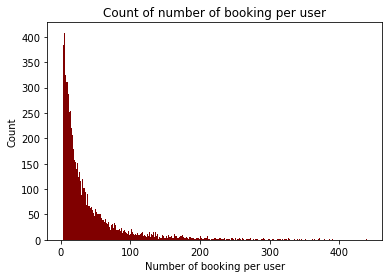

In [8]:
#bookings by users
df_booking_count = df_user_booking_count.groupby(by=['booking_count']).count()['user_id'].reset_index()
print(df_booking_count)

x = df_booking_count['booking_count']
y = df_booking_count['user_id']

#creating the bar plot
plt.bar(x, y, color ='maroon',width = 1)
 
plt.xlabel("Number of booking per user")
plt.ylabel("Count")
plt.title("Count of number of booking per user")
plt.show()



In [9]:
print(x)

0        3
1        4
2        5
3        6
4        7
      ... 
305    385
306    386
307    388
308    390
309    439
Name: booking_count, Length: 310, dtype: int64


In [10]:
df_train_2 = pd.merge(df_train, df_user_booking_count, on="user_id", how="left")

print(df_train_2.columns)

from pandasql import sqldf

pysqldf = lambda q: sqldf(q, globals())

q = """SELECT DISTINCT hotel_cluster,user_id,booking_count 
       FROM df_train_2;"""

df_stack = pysqldf(q)



#stack - count of users 

df_stackbar1 = df_stack[df_stack['booking_count'] == 1].groupby(by=['hotel_cluster']).count()['user_id'].reset_index()
df_stackbar2 = df_stack[df_stack['booking_count'] == 2].groupby(by=['hotel_cluster']).count()['user_id'].reset_index()
df_stackbar3 = df_stack[df_stack['booking_count'] == 3].groupby(by=['hotel_cluster']).count()['user_id'].reset_index()
df_stackbar4 = df_stack[df_stack['booking_count'] == 4].groupby(by=['hotel_cluster']).count()['user_id'].reset_index()
df_stackbar5 = df_stack[df_stack['booking_count'] == 5].groupby(by=['hotel_cluster']).count()['user_id'].reset_index()
df_stackbar6 = df_stack[df_stack['booking_count'] >= 6].groupby(by=['hotel_cluster']).count()['user_id'].reset_index()

trace1 = go.Bar(
    x= df_stackbar1['hotel_cluster'],
    y= df_stackbar1['user_id'],
    name='1'
)

trace2= go.Bar(
    x= df_stackbar2['hotel_cluster'],
    y= df_stackbar2['user_id'],
    name='2'
)

trace3 = go.Bar(
    x= df_stackbar3['hotel_cluster'],
    y= df_stackbar3['user_id'],
    name='3'
)

trace4= go.Bar(
    x= df_stackbar4['hotel_cluster'],
    y= df_stackbar4['user_id'],
    name='4'
)

trace5 = go.Bar(
    x= df_stackbar5['hotel_cluster'],
    y= df_stackbar5['user_id'],
    name='5'
)

trace6 = go.Bar(
    x= df_stackbar5['hotel_cluster'],
    y= df_stackbar5['user_id'],
    name='6'
)



data = [trace1,trace2,trace3,trace4,trace5,trace6]
layout = go.Layout(
    barmode='stack',
    title='User count by hotel cluster',
    yaxis=dict(
    title='User Count'
    ),
    xaxis=dict(
    title='Hotel Cluster')
)

fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)


#stack - count of bookings 

df_stackbar1 = df_train_2[df_train_2['booking_count'] == 1].groupby(by=['hotel_cluster']).count()['user_id'].reset_index()
df_stackbar2 = df_train_2[df_train_2['booking_count'] == 2].groupby(by=['hotel_cluster']).count()['user_id'].reset_index()
df_stackbar3 = df_train_2[df_train_2['booking_count'] == 3].groupby(by=['hotel_cluster']).count()['user_id'].reset_index()
df_stackbar4 = df_train_2[df_train_2['booking_count'] == 4].groupby(by=['hotel_cluster']).count()['user_id'].reset_index()
df_stackbar5 = df_train_2[df_train_2['booking_count'] == 5].groupby(by=['hotel_cluster']).count()['user_id'].reset_index()
df_stackbar6 = df_train_2[df_train_2['booking_count'] >= 6].groupby(by=['hotel_cluster']).count()['user_id'].reset_index()

trace1 = go.Bar(
    x= df_stackbar1['hotel_cluster'],
    y= df_stackbar1['user_id'],
    name='1'
)

trace2= go.Bar(
    x= df_stackbar2['hotel_cluster'],
    y= df_stackbar2['user_id'],
    name='2'
)

trace3 = go.Bar(
    x= df_stackbar3['hotel_cluster'],
    y= df_stackbar3['user_id'],
    name='3'
)

trace4= go.Bar(
    x= df_stackbar4['hotel_cluster'],
    y= df_stackbar4['user_id'],
    name='4'
)

trace5 = go.Bar(
    x= df_stackbar5['hotel_cluster'],
    y= df_stackbar5['user_id'],
    name='5'
)

trace6 = go.Bar(
    x= df_stackbar5['hotel_cluster'],
    y= df_stackbar5['user_id'],
    name='6'
)



data = [trace1,trace2,trace3,trace4,trace5,trace6]
layout = go.Layout(
    barmode='stack',
    title='Booking count by hotel cluster',
    yaxis=dict(
    title='Booking Count'
    ),
    xaxis=dict(
    title='Hotel Cluster')
)

fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)


Index(['date_time', 'site_name', 'posa_continent', 'user_location_country',
       'user_location_region', 'user_location_city',
       'orig_destination_distance', 'user_id', 'is_mobile', 'is_package',
       'channel', 'srch_ci', 'srch_co', 'srch_adults_cnt', 'srch_children_cnt',
       'srch_rm_cnt', 'srch_destination_id', 'srch_destination_type_id',
       'is_booking', 'cnt', 'hotel_continent', 'hotel_country', 'hotel_market',
       'hotel_cluster', 'date', 'booking_count'],
      dtype='object')


In [11]:
print(df_stack)

        hotel_cluster  user_id  booking_count
0                  13    22730             31
1                  10    22730             31
2                   9    22730             31
3                  16    22730             31
4                  91    22730             31
...               ...      ...            ...
148704             23  1146090              9
148705             34  1146090              9
148706              7  1146090              9
148707             48  1146090              9
148708             16  1146090              9

[148709 rows x 3 columns]


In [12]:
#month of search
df_train_2['month'] = pd.DatetimeIndex(df_train_2['date_time']).month


df_stackbar1 = df_train_2[df_train_2['month'] == 1].groupby(by=['hotel_cluster']).count()['user_id'].reset_index()
df_stackbar2 = df_train_2[df_train_2['month'] == 2].groupby(by=['hotel_cluster']).count()['user_id'].reset_index()
df_stackbar3 = df_train_2[df_train_2['month'] == 3].groupby(by=['hotel_cluster']).count()['user_id'].reset_index()
df_stackbar4 = df_train_2[df_train_2['month'] == 4].groupby(by=['hotel_cluster']).count()['user_id'].reset_index()
df_stackbar5 = df_train_2[df_train_2['month'] == 5].groupby(by=['hotel_cluster']).count()['user_id'].reset_index()
df_stackbar6 = df_train_2[df_train_2['month'] == 6].groupby(by=['hotel_cluster']).count()['user_id'].reset_index()
df_stackbar7 = df_train_2[df_train_2['month'] == 7].groupby(by=['hotel_cluster']).count()['user_id'].reset_index()
df_stackbar8 = df_train_2[df_train_2['month'] == 8].groupby(by=['hotel_cluster']).count()['user_id'].reset_index()
df_stackbar9 = df_train_2[df_train_2['month'] == 9].groupby(by=['hotel_cluster']).count()['user_id'].reset_index()
df_stackbar10 = df_train_2[df_train_2['month'] == 10].groupby(by=['hotel_cluster']).count()['user_id'].reset_index()
df_stackbar11 = df_train_2[df_train_2['month'] == 11].groupby(by=['hotel_cluster']).count()['user_id'].reset_index()
df_stackbar12 = df_train_2[df_train_2['month'] == 12].groupby(by=['hotel_cluster']).count()['user_id'].reset_index()

In [13]:
#stack - month of search


trace1 = go.Bar(
    x= df_stackbar1['hotel_cluster'],
    y= df_stackbar1['user_id'],
    name='1'
)

trace2= go.Bar(
    x= df_stackbar2['hotel_cluster'],
    y= df_stackbar2['user_id'],
    name='2'
)

trace3 = go.Bar(
    x= df_stackbar3['hotel_cluster'],
    y= df_stackbar3['user_id'],
    name='3'
)

trace4= go.Bar(
    x= df_stackbar4['hotel_cluster'],
    y= df_stackbar4['user_id'],
    name='4'
)

trace5 = go.Bar(
    x= df_stackbar5['hotel_cluster'],
    y= df_stackbar5['user_id'],
    name='5'
)

trace6 = go.Bar(
    x= df_stackbar5['hotel_cluster'],
    y= df_stackbar5['user_id'],
    name='6'
)

trace7 = go.Bar(
    x= df_stackbar5['hotel_cluster'],
    y= df_stackbar5['user_id'],
    name='7'
)

trace8 = go.Bar(
    x= df_stackbar5['hotel_cluster'],
    y= df_stackbar5['user_id'],
    name='8'
)

trace9 = go.Bar(
    x= df_stackbar5['hotel_cluster'],
    y= df_stackbar5['user_id'],
    name='9'
)

trace10 = go.Bar(
    x= df_stackbar5['hotel_cluster'],
    y= df_stackbar5['user_id'],
    name='10'
)

trace11 = go.Bar(
    x= df_stackbar5['hotel_cluster'],
    y= df_stackbar5['user_id'],
    name='11'
)

trace12 = go.Bar(
    x= df_stackbar5['hotel_cluster'],
    y= df_stackbar5['user_id'],
    name='12'
)




data = [trace1,trace2,trace3,trace4,trace5,trace6,trace7,trace8,trace9,trace10,trace11,trace12]
layout = go.Layout(
    barmode='stack',
    title='Search Count By Month',
    yaxis=dict(
    title='Search Count'
    ),
    xaxis=dict(
    title='Hotel Cluster')
)

fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)


In [14]:
print(len(df_train_2['srch_destination_type_id'].unique()))

8


In [15]:
#type of search destination 

df_stackbar1 = df_train_2[df_train_2['srch_destination_type_id'] == 1].groupby(by=['hotel_cluster']).count()['user_id'].reset_index()
df_stackbar2 = df_train_2[df_train_2['srch_destination_type_id'] == 2].groupby(by=['hotel_cluster']).count()['user_id'].reset_index()
df_stackbar3 = df_train_2[df_train_2['srch_destination_type_id'] == 3].groupby(by=['hotel_cluster']).count()['user_id'].reset_index()
df_stackbar4 = df_train_2[df_train_2['srch_destination_type_id'] == 4].groupby(by=['hotel_cluster']).count()['user_id'].reset_index()
df_stackbar5 = df_train_2[df_train_2['srch_destination_type_id'] == 5].groupby(by=['hotel_cluster']).count()['user_id'].reset_index()
df_stackbar6 = df_train_2[df_train_2['srch_destination_type_id'] == 6].groupby(by=['hotel_cluster']).count()['user_id'].reset_index()
df_stackbar7 = df_train_2[df_train_2['srch_destination_type_id'] == 7].groupby(by=['hotel_cluster']).count()['user_id'].reset_index()
df_stackbar8 = df_train_2[df_train_2['srch_destination_type_id'] == 8].groupby(by=['hotel_cluster']).count()['user_id'].reset_index()
df_stackbar9 = df_train_2[df_train_2['srch_destination_type_id'] == 9].groupby(by=['hotel_cluster']).count()['user_id'].reset_index()


In [16]:
#stack - type of search destination 


trace1 = go.Bar(
    x= df_stackbar1['hotel_cluster'],
    y= df_stackbar1['user_id'],
    name='1'
)

trace2= go.Bar(
    x= df_stackbar2['hotel_cluster'],
    y= df_stackbar2['user_id'],
    name='2'
)

trace3 = go.Bar(
    x= df_stackbar3['hotel_cluster'],
    y= df_stackbar3['user_id'],
    name='3'
)

trace4= go.Bar(
    x= df_stackbar4['hotel_cluster'],
    y= df_stackbar4['user_id'],
    name='4'
)

trace5 = go.Bar(
    x= df_stackbar5['hotel_cluster'],
    y= df_stackbar5['user_id'],
    name='5'
)

trace6 = go.Bar(
    x= df_stackbar5['hotel_cluster'],
    y= df_stackbar5['user_id'],
    name='6'
)

trace7 = go.Bar(
    x= df_stackbar5['hotel_cluster'],
    y= df_stackbar5['user_id'],
    name='7'
)

trace8 = go.Bar(
    x= df_stackbar5['hotel_cluster'],
    y= df_stackbar5['user_id'],
    name='8'
)

trace9 = go.Bar(
    x= df_stackbar5['hotel_cluster'],
    y= df_stackbar5['user_id'],
    name='9'
)




data = [trace1,trace2,trace3,trace4,trace5,trace6,trace7,trace8,trace9]
layout = go.Layout(
    barmode='stack',
    title='Search Count By Search Type',
    yaxis=dict(
    title='Search Count'
    ),
    xaxis=dict(
    title='Hotel Cluster')
)

fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)


In [17]:
print(len(df_train_2['hotel_market'].unique()))
print(len(df_train_2['hotel_country'].unique()))

1952
187


<AxesSubplot:xlabel='duration'>

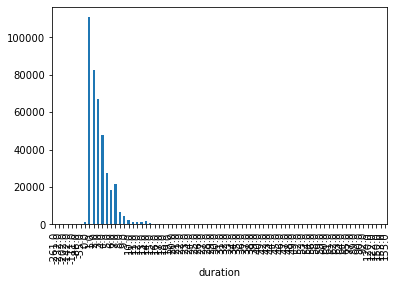

In [18]:
#duration of a stay 
df_train_2['srch_co'] = pd.to_datetime(df_train_2['srch_co'])
df_train_2['srch_ci'] = pd.to_datetime(df_train_2['srch_ci'])
df_train_2['duration'] = df_train_2['srch_co'] - df_train_2['srch_ci']

df_train_2['duration'] = df_train_2['duration']/np.timedelta64(1,'D')

df_train_2.groupby('duration').count()['user_id'].plot.bar()




In [19]:
print(df_train_2['srch_co'])

0        2013-02-03
1        2013-02-03
2        2013-02-22
3        2013-02-22
4        2013-02-22
            ...    
399001   2014-05-26
399002   2014-05-26
399003   2014-05-24
399004   2014-05-24
399005   2014-05-24
Name: srch_co, Length: 399006, dtype: datetime64[ns]


In [20]:
#use PCA to reduce dim of the dest dataset 
from sklearn.decomposition import PCA

#standardize dataset 
x = df_dest.values #convert the data into a numpy array
x = scale(x);x

#covariance matrix with the 150 features
covar_matrix = PCA(n_components=150)
covar_matrix.fit(x)
#calculate variance ratios
variance = covar_matrix.explained_variance_ratio_ 
#cumulative sum of variance explained with [n] features
var=np.cumsum(np.round(covar_matrix.explained_variance_ratio_, decimals=3)*100)
var 

#the first 8 eigenvalues represents 66% of the variance in the data
pca = PCA(n_components= 8)
dest_small = pca.fit_transform(df_dest[["d{0}".format(i + 1) for i in range(149)]])
dest_small = pd.DataFrame(dest_small)
dest_small["srch_destination_id"] = df_dest["srch_destination_id"]



In [21]:
dest_small.head()
dest_small.describe()

,0,1,2,3,4,5,6,7,srch_destination_id
count,6.210600e+04,6.210600e+04,6.210600e+04,6.210600e+04,6.210600e+04,6.210600e+04,6.210600e+04,6.210600e+04,62106.000000
mean,-3.223027e-16,-3.331397e-16,-1.835577e-16,2.423029e-16,3.160976e-16,-6.921453e-17,-2.493308e-17,-4.766548e-17,32359.463884
std,5.218142e-01,2.529521e-01,1.653930e-01,1.217086e-01,1.175144e-01,1.120834e-01,9.995317e-02,9.459436e-02,18711.765765
min,-6.101911e-01,-8.273612e-01,-8.966624e-01,-5.307322e-01,-5.244980e-01,-5.027911e-01,-4.476472e-01,-6.130289e-01,0.000000
25%,-4.273949e-01,-1.054172e-01,-6.759648e-02,-5.735178e-02,-6.122263e-02,-5.638467e-02,-4.663594e-02,-4.702855e-02,16320.250000
50%,-1.358665e-01,-3.215461e-02,-1.501543e-02,-1.764032e-02,-7.137245e-03,7.625603e-03,9.111882e-03,5.409911e-03,32277.500000
75%,3.008873e-01,1.504895e-02,8.047973e-02,6.061724e-02,3.552097e-02,4.977892e-02,3.985461e-02,3.765695e-02,48467.750000
max,3.669258e+00,2.326228e+00,1.097049e+00,8.771733e-01,1.051895e+00,1.111884e+00,1.023937e+00,1.617139e+00,64993.000000


In [22]:
df_train_3 = pd.merge(df_train_2, dest_small, on="srch_destination_id", how="left")

df_train_3['year'] = pd.DatetimeIndex(df_train_2['date_time']).year
df_train_3['month'] = pd.DatetimeIndex(df_train_2['date_time']).month
df_train_3['week'] = pd.DatetimeIndex(df_train_2['date_time']).week

df_train_3['srch_ci_month'] = pd.DatetimeIndex(df_train_2['srch_ci']).month
df_train_3['srch_ci_week'] = pd.DatetimeIndex(df_train_2['srch_ci']).week

df_train_3['srch_co_month'] = pd.DatetimeIndex(df_train_2['srch_co']).month
df_train_3['srch_co_week'] = pd.DatetimeIndex(df_train_2['srch_co']).week





<ipython-input-22-ded2473dc351>:5: FutureWarning:

weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)

<ipython-input-22-ded2473dc351>:8: FutureWarning:

weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)

<ipython-input-22-ded2473dc351>:11: FutureWarning:

weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)



In [23]:
print(df_train_3['year'].unique())
print(df_train_3['month'].unique())
print(df_train_3['week'].unique())

[2013 2014]
[ 1  2  3  6 10 12  4  7  8 11  9  5]
[ 3  7 11 23 25 26 40 44 52  5  6 10 17 49 29 35 33 47 31 18 37 24 45 51
  4  8 12 21 27 30 41 50 32 36 14 28 39  1 16 13 42 34 20 46  9 43 19 22
 38 48 15  2]


In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=1000, n_features=4,n_informative=2, n_redundant=0,random_state=0, shuffle=False)
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X, y)
RandomForestClassifier(...)
print(clf.predict([[0, 0, 0, 0]]))


[1]


In [25]:
print(df_train_3.columns)
#print(df_train_3.describe)

Index([                'date_time',                 'site_name',
                  'posa_continent',     'user_location_country',
            'user_location_region',        'user_location_city',
       'orig_destination_distance',                   'user_id',
                       'is_mobile',                'is_package',
                         'channel',                   'srch_ci',
                         'srch_co',           'srch_adults_cnt',
               'srch_children_cnt',               'srch_rm_cnt',
             'srch_destination_id',  'srch_destination_type_id',
                      'is_booking',                       'cnt',
                 'hotel_continent',             'hotel_country',
                    'hotel_market',             'hotel_cluster',
                            'date',             'booking_count',
                           'month',                  'duration',
                                 0,                           1,
                         

In [26]:
print(df_train_3.columns)
#print(df_train_3.describe)

df_train_3 = df_train_3.rename(
    columns={"1": "dest_feature_1","2": "dest_feature_2","3": "dest_feature_3","4": "dest_feature_4","5": "dest_feature_5","6": "dest_feature_6","7": "dest_feature_7"})

for col in df_train_3.columns:
    if type(df_train_3[col]) == str:
        df_train_3 = df_train_3.rename(columns={col: '{}_cat'.format(col)})
    else:
        df_train_3 = df_train_3.rename(columns={col: '{}_cont'.format(col)})

print(df_train_3.columns)        

#rename features by type - ideally you want to do that but today i am too lazy
#key_vars = [j for j in df.columns if j.startswith('KEY_')]
#cat_vars = [j for j in df.columns if j.startswith('CAT_')]
#cont_vars = [j for j in df.columns if j.startswith('NUM_')]

#encode cyclical features
cyclical_features = ['week_cont','month_cont','srch_ci_month_cont','srch_ci_week_cont','srch_co_month_cont','srch_co_week_cont']
for i in cyclical_features :
    if i in ['month_cont','srch_ci_month_cont','srch_co_month_cont']:
        N = 12
    else:
        N = 52
    df_train_3[i+'_sin'] = np.sin(2 * np.pi * df_train_3[i]/N)
    df_train_3[i+'_cos'] = np.cos(2 * np.pi * df_train_3[i]/N)


#remove useless features - for future reference, remove what you dont need first and then add suffix cat & cont
for i in ['date_time_cont','dest_feature_1_cont','dest_feature_2_cont','dest_feature_3_cont','dest_feature_4_cont','dest_feature_5_cont','dest_feature_6_cont','dest_feature_1','dest_feature_7_cont','srch_ci_cont','srch_co_cont','user_id_cont']:
    try:
        df_train_3 = df_train_3.drop(columns = i)
    except:
        print('no deleted')

print(df_train_3.columns)



Index([                'date_time',                 'site_name',
                  'posa_continent',     'user_location_country',
            'user_location_region',        'user_location_city',
       'orig_destination_distance',                   'user_id',
                       'is_mobile',                'is_package',
                         'channel',                   'srch_ci',
                         'srch_co',           'srch_adults_cnt',
               'srch_children_cnt',               'srch_rm_cnt',
             'srch_destination_id',  'srch_destination_type_id',
                      'is_booking',                       'cnt',
                 'hotel_continent',             'hotel_country',
                    'hotel_market',             'hotel_cluster',
                            'date',             'booking_count',
                           'month',                  'duration',
                                 0,                           1,
                         

In [61]:
#ml
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.feature_selection import SelectPercentile, f_classif
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler


#pipeline for num
numerical_pipe = Pipeline(
                steps=[
                      ('SimpleImputerNaN', SimpleImputer(missing_values=np.nan, strategy='mean')),
                      ('MinMaxScaler', MinMaxScaler())
        ]
)

#pipeline for string
str_pipe = Pipeline(
        steps=[
           ('SimpleImputerNone', SimpleImputer(missing_values=None, strategy='most_frequent', fill_value='IS_MISSING'))
          ,('OneHotEncoder', OneHotEncoder(sparse=False, handle_unknown='ignore'))
        ]
)

#apply column transformer
column_trans = make_column_transformer(              
    (numerical_pipe, make_column_selector(dtype_include=np.number)),
    (str_pipe, make_column_selector(dtype_include=object)),
    
    n_jobs=-1,

    #how to handle the rest of the data
     remainder='drop')

In [77]:
def objective(params, pipeline, X, y):
    
    params = {
    #number of trees in forest
    'n_estimators': params['n_estimators'],
    
    #max number of levels in a tree
    'max_depth': params['max_depth'],
    
    #minimum number of samples required at a split node
    'min_samples_split': params['min_samples_split'],
    
    #minimum number of samples required at each leaf node
    'min_samples_leaf': params['min_samples_leaf'],
    
    }
                
    mExtraTreesClassifier = ExtraTreesClassifier(
             random_state=101
            ,n_jobs=-1
            ,**params
            )
    
    ml_pipeline = make_pipeline(
                pipeline
               ,mExtraTreesClassifier
    )    
    
# =============================================================================
#     Note that since we are trying to maximize the cross-validation accuracy (acc in the code below)
#     we must negate this value for hyperopt, since hyperopt only knows how to minimize a function. 
#     Minimizing a function f is the same as maximizing the negative of f
# =============================================================================
    cv_scores = cross_val_score(ml_pipeline
               ,X = X
               ,y = y
               ,cv = 3
               ,scoring='precision_micro' 
               ,n_jobs = -1).mean()
    
    return {'loss': -cv_scores}

In [78]:
#drop features with the same value in the column
vthreshold = VarianceThreshold(threshold=0.0)

#select features whose importance is greater than mean
selector = SelectPercentile(score_func=f_classif, percentile=50)            


In [79]:
#df_train_final = df_train_3[((df_train_3.year_cont == 2013) | ((df_train_3.year_cont == 2014) & (df_train_3.month_cont < 8)))]
#df_test_final = df_train_3[((df_train_3.year_cont == 2014) & (df_train_3.year_cont >= 8))]
#print(len(df_train_final))
#print(len(df_test_final))

#Define feature matrix
X = df_train_3
X = X.dropna(axis=1,how='all')

#Target variable
y = df_train_3['hotel_cluster_cont']

#setting temp flag
hyper_parameter_optimization=1
 
ml_pipeline = make_pipeline(column_trans,vthreshold,selector)    

X_train, X_test, y_train, y_test = train_test_split(
        X
      , y
      , test_size=0.2
      , random_state=101
      , shuffle=True)



In [80]:
print(len(X_train))
print(len(X_test))

319204
79802


In [81]:

'''
# hyperparameter optimization
import hyperopt as hp
from hyperopt import Trials,fmin,STATUS_OK, tpe,space_eval
from functools import partial

search_space = {
###########################################################
# choice will select 1 value from the given list
# quniform returns a float between a given range
###########################################################
# number of trees in forest
'n_estimators': hp.hp.choice('n_estimators', np.arange(1, 10 , 2, dtype=int)),

# max number of levels in a tree
'max_depth': hp.hp.choice('max_depth', np.arange(5, 50, 5, dtype=int)),

# minimum number of samples required at a split node
'min_samples_split': hp.hp.choice('min_samples_split', np.arange(2, 20, 1, dtype=int)),

# minimum number of samples required at each leaf node
'min_samples_leaf': hp.hp.choice('min_samples_leaf', np.arange(1, 20, 1, dtype=int)),

}

#trials will contain logging information
trials = Trials()

#using func partial to run function with extra parameters passsed
fmin_objective = partial(objective
                        ,pipeline=ml_pipeline
                        ,X=X_train
                        ,y=y_train
                         )

#optimize
best=fmin(
		  # function to optimize
		  fn=fmin_objective,

		  # search parameter space
          space=search_space, 
		  
		  # optimization algorithm, hyperotp will select its parameters automatically
          algo=tpe.suggest, 
          
		  # number of parameters iterations to try
		  max_evals=2, 
          
		  # logging
		  trials=trials, 
		  
		  # random state
          rstate=np.random.RandomState(101)
         )

#grab parameters based on hyperparameter optimization
best_params=space_eval(search_space, best)
 
mExtraTreesClassifier = ExtraTreesClassifier(
         random_state=101
        ,n_jobs=-1
        ,**best_params
        )
           
ml_pipeline = make_pipeline(
            ml_pipeline
           ,mExtraTreesClassifier
)'''


"\n# hyperparameter optimization\nimport hyperopt as hp\nfrom hyperopt import Trials,fmin,STATUS_OK, tpe,space_eval\nfrom functools import partial\n\nsearch_space = {\n###########################################################\n# choice will select 1 value from the given list\n# quniform returns a float between a given range\n###########################################################\n# number of trees in forest\n'n_estimators': hp.hp.choice('n_estimators', np.arange(1, 10 , 2, dtype=int)),\n\n# max number of levels in a tree\n'max_depth': hp.hp.choice('max_depth', np.arange(5, 50, 5, dtype=int)),\n\n# minimum number of samples required at a split node\n'min_samples_split': hp.hp.choice('min_samples_split', np.arange(2, 20, 1, dtype=int)),\n\n# minimum number of samples required at each leaf node\n'min_samples_leaf': hp.hp.choice('min_samples_leaf', np.arange(1, 20, 1, dtype=int)),\n\n}\n\n#trials will contain logging information\ntrials = Trials()\n\n#using func partial to run funct

In [82]:
#i used my own parameter 
my_params = {
# number of trees in forest
'n_estimators': 1000,

#max number of levels in a tree
'max_depth': 20,

#minimum number of samples required at a split node
'min_samples_split': 4,

#minimum number of samples required at each leaf node
'min_samples_leaf': 2,

}
       
        
#we skipped the optmization part 
mExtraTreesClassifier = ExtraTreesClassifier(
         random_state=101
        ,n_jobs=-1
        ,**my_params
        )
           
ml_pipeline = make_pipeline(
            ml_pipeline
           ,mExtraTreesClassifier
)

        




In [83]:
#train/test rmse without k fold validation
ml_pipeline.fit(X_train, y_train)
va_prediction = ml_pipeline.predict(X_train)

In [84]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import metrics 

confusion_matrix(y_train, va_prediction)

cm_df = pd.DataFrame(confusion_matrix(y_train, va_prediction))

#print the accuracy precision and recall, among other metrics
print(metrics.classification_report(y_train, va_prediction, digits=3))
print(accuracy_score(y_train, va_prediction, normalize=False))

#accuracy with 5 trees ~ 14%, 10 trees ~ 20%, 100 trees ~ 73% and 1000 trees ~ 75%

              precision    recall  f1-score   support

           0      0.742     0.992     0.849      3200
           1      0.708     0.999     0.829      3631
           2      0.878     0.976     0.924      3766
           3      0.974     0.764     0.856      1988
           4      0.861     0.925     0.892      2967
           5      0.750     0.902     0.819      5260
           6      0.900     0.857     0.878      3531
           7      0.932     0.790     0.855      2221
           8      0.771     0.902     0.831      2939
           9      0.866     0.864     0.865      4130
          10      0.895     0.710     0.792      3313
          11      0.857     0.790     0.822      3140
          12      0.805     0.889     0.845      2261
          13      0.922     0.843     0.881      2931
          14      0.955     0.554     0.701      1704
          15      0.934     0.665     0.777      2715
          16      0.801     0.859     0.829      4018
          17      0.869    

In [85]:
va_prediction_test = ml_pipeline.predict(X_test)
confusion_matrix(y_test, va_prediction_test)

print(metrics.classification_report(y_test, va_prediction_test, digits=3))
print(accuracy_score(y_test, va_prediction_test, normalize=False))

#accuracy 50% testing data

              precision    recall  f1-score   support

           0      0.567     0.981     0.719       821
           1      0.624     0.996     0.767       904
           2      0.710     0.846     0.772       988
           3      0.774     0.354     0.486       494
           4      0.637     0.761     0.693       704
           5      0.464     0.669     0.548      1336
           6      0.668     0.590     0.626       904
           7      0.694     0.520     0.595       546
           8      0.590     0.708     0.643       715
           9      0.635     0.608     0.621      1048
          10      0.660     0.353     0.460       858
          11      0.600     0.498     0.544       795
          12      0.620     0.680     0.649       569
          13      0.702     0.529     0.604       705
          14      0.752     0.268     0.395       429
          15      0.702     0.344     0.461       678
          16      0.544     0.598     0.570       995
          17      0.549    

In [89]:
from sklearn.ensemble import AdaBoostClassifier

#create adaboost classifer object
abc = AdaBoostClassifier(n_estimators=100,
                         learning_rate=1)


#add to the pipeline
ml_pipeline = make_pipeline(column_trans,vthreshold,selector)  
ml_pipeline = make_pipeline(
            ml_pipeline
           ,abc)

#train Adaboost Classifer
model = ml_pipeline.fit(X_train, y_train)

#predict the response for test dataset
va_prediction = model.predict(X_train)



C:\Users\tfrancois\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



              precision    recall  f1-score   support

           0      1.000     1.000     1.000      3200
           1      0.000     0.000     0.000      3631
           2      0.000     0.000     0.000      3766
           3      0.000     0.000     0.000      1988
           4      0.000     0.000     0.000      2967
           5      0.056     1.000     0.105      5260
           6      0.000     0.000     0.000      3531
           7      0.000     0.000     0.000      2221
           8      0.000     0.000     0.000      2939
           9      0.000     0.000     0.000      4130
          10      0.000     0.000     0.000      3313
          11      0.000     0.000     0.000      3140
          12      0.000     0.000     0.000      2261
          13      0.000     0.000     0.000      2931
          14      0.000     0.000     0.000      1704
          15      0.000     0.000     0.000      2715
          16      0.000     0.000     0.000      4018
          17      0.000    

C:\Users\tfrancois\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\tfrancois\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [90]:
confusion_matrix(y_train, va_prediction)

#print the accuracy precision and recall, among other metrics
print(metrics.classification_report(y_train, va_prediction, digits=3))
print(accuracy_score(y_train, va_prediction, normalize=False))

C:\Users\tfrancois\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



              precision    recall  f1-score   support

           0      1.000     1.000     1.000      3200
           1      0.000     0.000     0.000      3631
           2      0.000     0.000     0.000      3766
           3      0.000     0.000     0.000      1988
           4      0.000     0.000     0.000      2967
           5      0.056     1.000     0.105      5260
           6      0.000     0.000     0.000      3531
           7      0.000     0.000     0.000      2221
           8      0.000     0.000     0.000      2939
           9      0.000     0.000     0.000      4130
          10      0.000     0.000     0.000      3313
          11      0.000     0.000     0.000      3140
          12      0.000     0.000     0.000      2261
          13      0.000     0.000     0.000      2931
          14      0.000     0.000     0.000      1704
          15      0.000     0.000     0.000      2715
          16      0.000     0.000     0.000      4018
          17      0.000    

C:\Users\tfrancois\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\tfrancois\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

